In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import LinearAxis, Range1d
from bokeh.layouts import row, column

In [2]:
df = pd.read_csv('../Datasets/Covid/covid_19_clean_complete.csv')

### Some general information about the dataset

In [3]:
print(df.info())
df[df['Country/Region']=='Greece'].tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22270 entries, 0 to 22269
Data columns (total 8 columns):
Province/State    6800 non-null object
Country/Region    22270 non-null object
Lat               22270 non-null float64
Long              22270 non-null float64
Date              22270 non-null object
Confirmed         22270 non-null int64
Deaths            22270 non-null int64
Recovered         22270 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.4+ MB
None


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
21082,NaN,Greece,39.0742,21.8243,4/11/20,2081,93,269
21344,NaN,Greece,39.0742,21.8243,4/12/20,2114,98,269
21606,NaN,Greece,39.0742,21.8243,4/13/20,2145,99,269
21868,NaN,Greece,39.0742,21.8243,4/14/20,2170,101,269
22130,NaN,Greece,39.0742,21.8243,4/15/20,2192,102,269


### Extracting the day and month 

In [4]:
df['Day']=df['Date'].apply(lambda x: int(x.split('/')[1]))           ##Turn Date into
df['Month']=df['Date'].apply(lambda x: int(x.split('/')[0]))         ##usefull, countable data.

### Sorting the countries
Sorting by confirmed cases, increase of confirmed cases over the previous day, deaths and increase of deaths over the previous day.

In [5]:
Country_List = df['Country/Region'].unique() #List of all countries in dataset
Confirmed_List = [] #List of confirmed cases of the countries in Country_List
Deaths_List = [] #List of deaths in above of the countries in Country_List
D_Confirmed_List = [] #List of change in the number of confirmed cases of the countries in Country_List
D_Confirmed_List_Mul = [] #List of multiplication factor of change in number of confirmed cases of the countries in Country_List
D_Deaths_List = [] #List of change in the number of deaths of the countries in Country_List
D_Deaths_List_Mul = [] #List of multiplication factor of change in the number of deaths of the countries in Country_List

dt = int(str(date.today()).split('-')[2])-int(df[df['Month']==df['Month'].max()]['Day'].max()) # The reference point for date depending on how old the latest data is.

for i in Country_List:
    Confirmed_List.append(df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt)).split('-')[2])]['Confirmed'].to_numpy()[0])
    Deaths_List.append(df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt)).split('-')[2])]['Deaths'].to_numpy()[0])
    D_Confirmed_List.append(df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt)).split('-')[2])]['Confirmed'].to_numpy()[0]-df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt+1)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt+1)).split('-')[2])]['Confirmed'].to_numpy()[0])
    D_Deaths_List.append(df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt)).split('-')[2])]['Deaths'].to_numpy()[0]-df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt+1)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt+1)).split('-')[2])]['Deaths'].to_numpy()[0])

for i in range(len(Deaths_List)):
    D_Confirmed_List_Mul.append(Confirmed_List[i]/(Confirmed_List[i]-D_Confirmed_List[i]))
    D_Deaths_List_Mul.append(Deaths_List[i]/(Deaths_List[i]-D_Deaths_List[i]))

Sorted_Confirmed_List = np.argsort(Confirmed_List)  #Sort by Confirmed Cases
Sorted_Deaths_List = np.argsort(Deaths_List)  # Sort by Deaths
Sorted_D_Confirmed_List = np.argsort(D_Confirmed_List) #Sort by change in Confirmed Cases
Sorted_D_Deaths_List = np.argsort(D_Deaths_List) #Sort by change in Deaths

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in longlong_scalars
c:\users\alexa\appdata\local\programs\python\python36\lib\

## Printing and vizualizing the latest data

### Based on the confirmed cases

In [6]:
#Making a list of countries with Greece being first while the rest of the countries included are sorted from worst to
#best accounting for the number of confirmed cases.
c_list = [Country_List.tolist().index('Greece')] + np.flip(Sorted_Confirmed_List[-3:]).tolist()

if Country_List.tolist().index('China') not in c_list:
    c_list=[Country_List.tolist().index('China')]+c_list

for i in c_list: #Printing the stats on the 4 countries
    print(Country_List[i]+
          ' \nConfirmed:',Confirmed_List[i],
          ' \nincrease over the previous day:',D_Confirmed_List[i],'(Increased by factor: x'+str(D_Confirmed_List_Mul[i])+')',
          ' \nDeaths:',Deaths_List[i],
          ' \nincrease over the previous day:',D_Deaths_List[i],'(Increased by factor: x'+str(D_Deaths_List_Mul[i])+')',
          ' \n')

print('As of '+str(date.today()-timedelta(days=dt))+'.')

China 
Confirmed: 991  
increase over the previous day: 0 (Increased by factor: x1.0)  
Deaths: 6  
increase over the previous day: 0 (Increased by factor: x1.0)  

Greece 
Confirmed: 2192  
increase over the previous day: 22 (Increased by factor: x1.0101382488479262)  
Deaths: 102  
increase over the previous day: 1 (Increased by factor: x1.00990099009901)  

US 
Confirmed: 636350  
increase over the previous day: 28680 (Increased by factor: x1.0471966692448205)  
Deaths: 28326  
increase over the previous day: 2494 (Increased by factor: x1.096546918550635)  

Spain 
Confirmed: 177644  
increase over the previous day: 5103 (Increased by factor: x1.0295755791377121)  
Deaths: 18708  
increase over the previous day: 652 (Increased by factor: x1.0361098803721756)  

Italy 
Confirmed: 165155  
increase over the previous day: 2667 (Increased by factor: x1.0164135197676136)  
Deaths: 21645  
increase over the previous day: 578 (Increased by factor: x1.0274362747424883)  

As of 2020-04-15.


### Ploting the confirmed cases of these countries
Note that we only plot the data AFTER the first reported incident with the virus on each country.

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


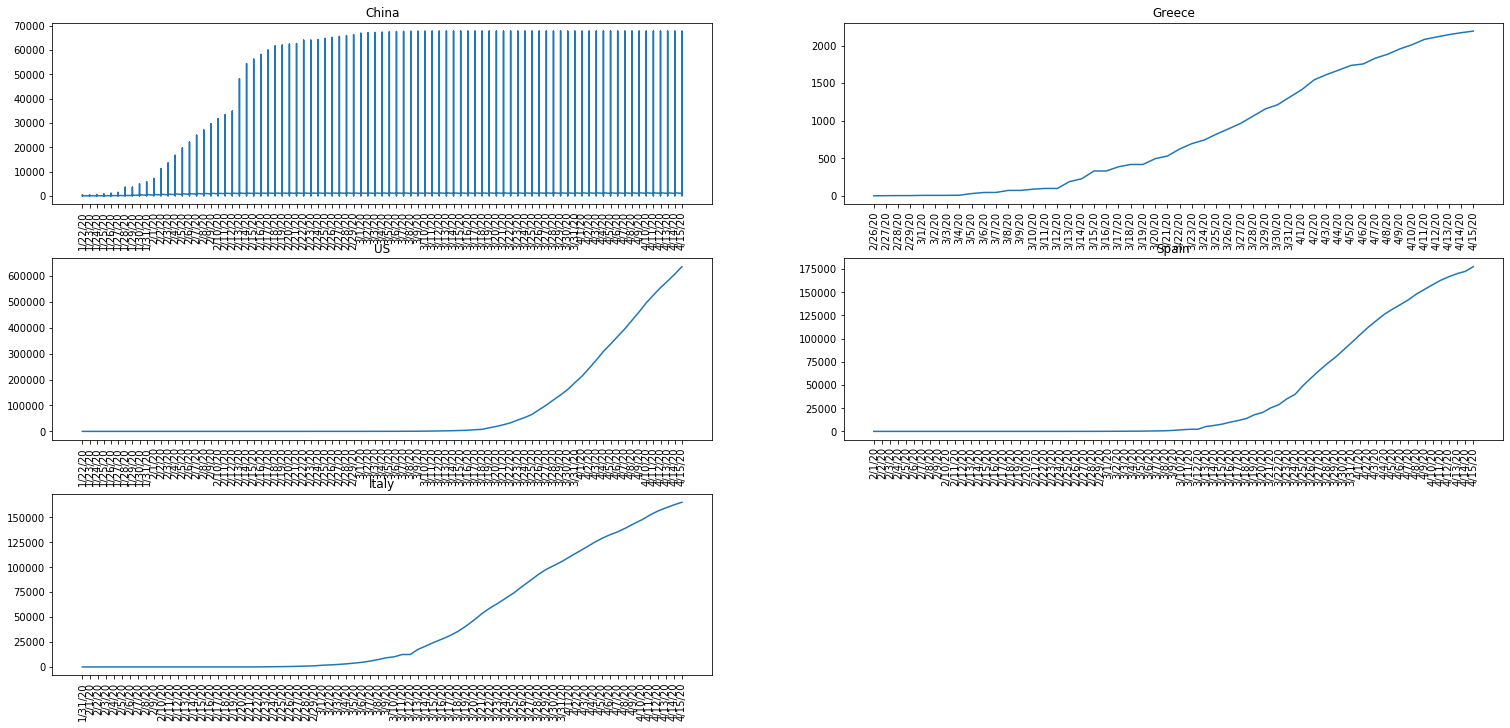

In [7]:
import math

f, axes = plt.subplots(math.ceil(len(c_list)/2), 2)
f.set_figheight(12)
f.set_figwidth(26)
f.subplots_adjust(wspace=0.2,hspace=0.3)
x=0
y=0

for i in c_list:
    X = df[df['Country/Region']==Country_List[i]][df['Confirmed']>0]['Date'].to_list()
    Y = df[df['Country/Region']==Country_List[i]][df['Confirmed']>0]['Confirmed'].to_list()
    for tick in axes[y][x].get_xticklabels():
        tick.set_rotation(90)
    axes[y][x].set_title(Country_List[i])
    axes[y][x].plot(X,Y)
    x+=1
    if x==2:
        x=0
        y+=1
if (len(c_list)-(2%len(c_list))*2)==1:
    f.delaxes(axes[-1][1])

### Focusing on China
Based on the fact that the 'Confirmed' row contains the total confirmed cases by that date, the data on China seems to be wrongly interpreted.

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


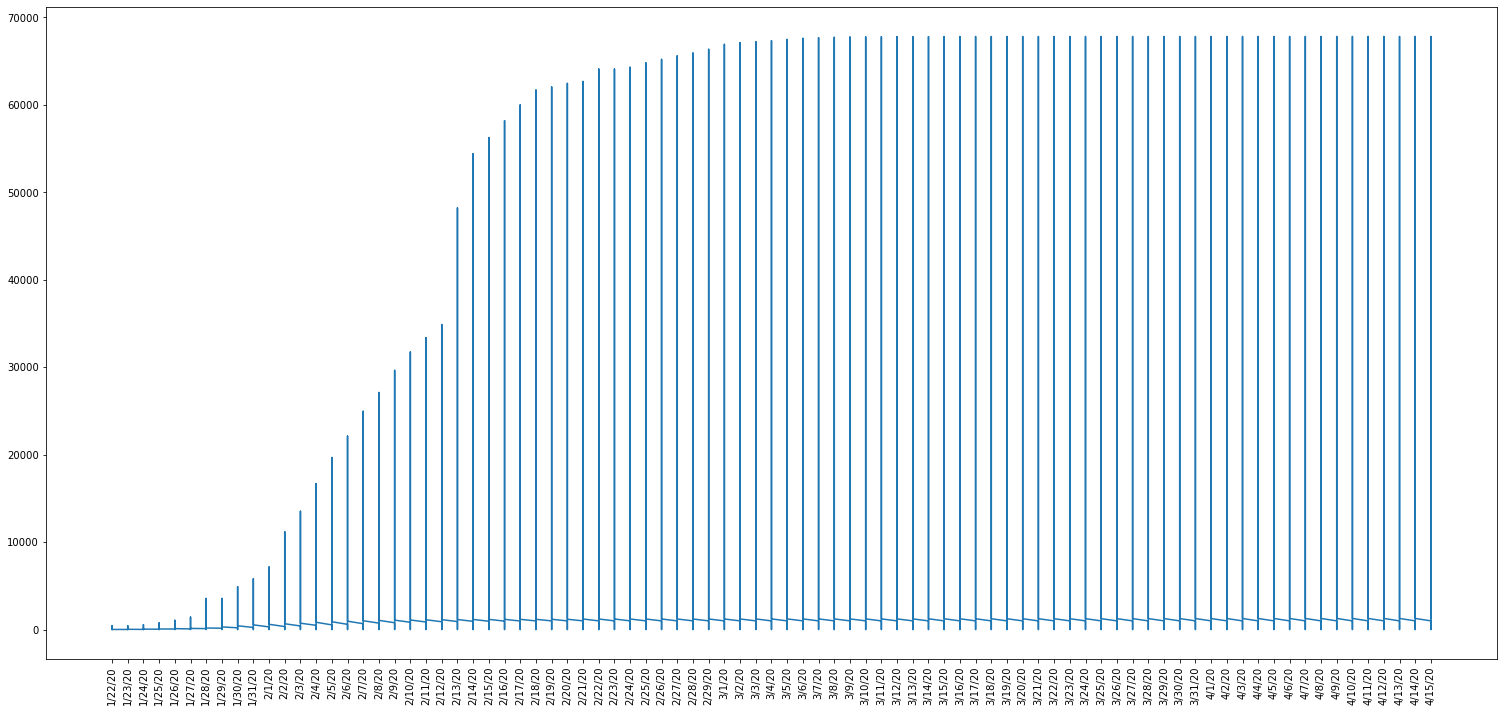

In [8]:
f,ax=plt.subplots(1,1)
f.set_figheight(12)
f.set_figwidth(26)
X = df[df['Country/Region']=='China'][df['Confirmed']>0]['Date'].to_list()
Y = df[df['Country/Region']=='China'][df['Confirmed']>0]['Confirmed'].to_list()
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.plot(X,Y)

### Not the case!
Actually, the data for China are sampled based on different states unlike the rest of the countries in the list. You should really take a look at your data before handling it!

In [9]:
df[df['Country/Region']=='China'].head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Day,Month
49,Anhui,China,31.8257,117.2264,1/22/20,1,0,0,22,1
50,Beijing,China,40.1824,116.4142,1/22/20,14,0,0,22,1
51,Chongqing,China,30.0572,107.8740,1/22/20,6,0,0,22,1
52,Fujian,China,26.0789,117.9874,1/22/20,1,0,0,22,1
53,Gansu,China,37.8099,101.0583,1/22/20,0,0,0,22,1


In [10]:
df[df['Country/Region']=='Italy'].head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Day,Month
137,NaN,Italy,43.0,12.0,1/22/20,0,0,0,22,1
399,NaN,Italy,43.0,12.0,1/23/20,0,0,0,23,1
661,NaN,Italy,43.0,12.0,1/24/20,0,0,0,24,1
923,NaN,Italy,43.0,12.0,1/25/20,0,0,0,25,1
1185,NaN,Italy,43.0,12.0,1/26/20,0,0,0,26,1


Making a list of countries that label data per Province/State:

In [11]:
p_c_list = df[~pd.isna(df['Province/State'])]['Country/Region'].unique()

### Ploting the real total confirmed cases per day for China
By summing the cases on each state.

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


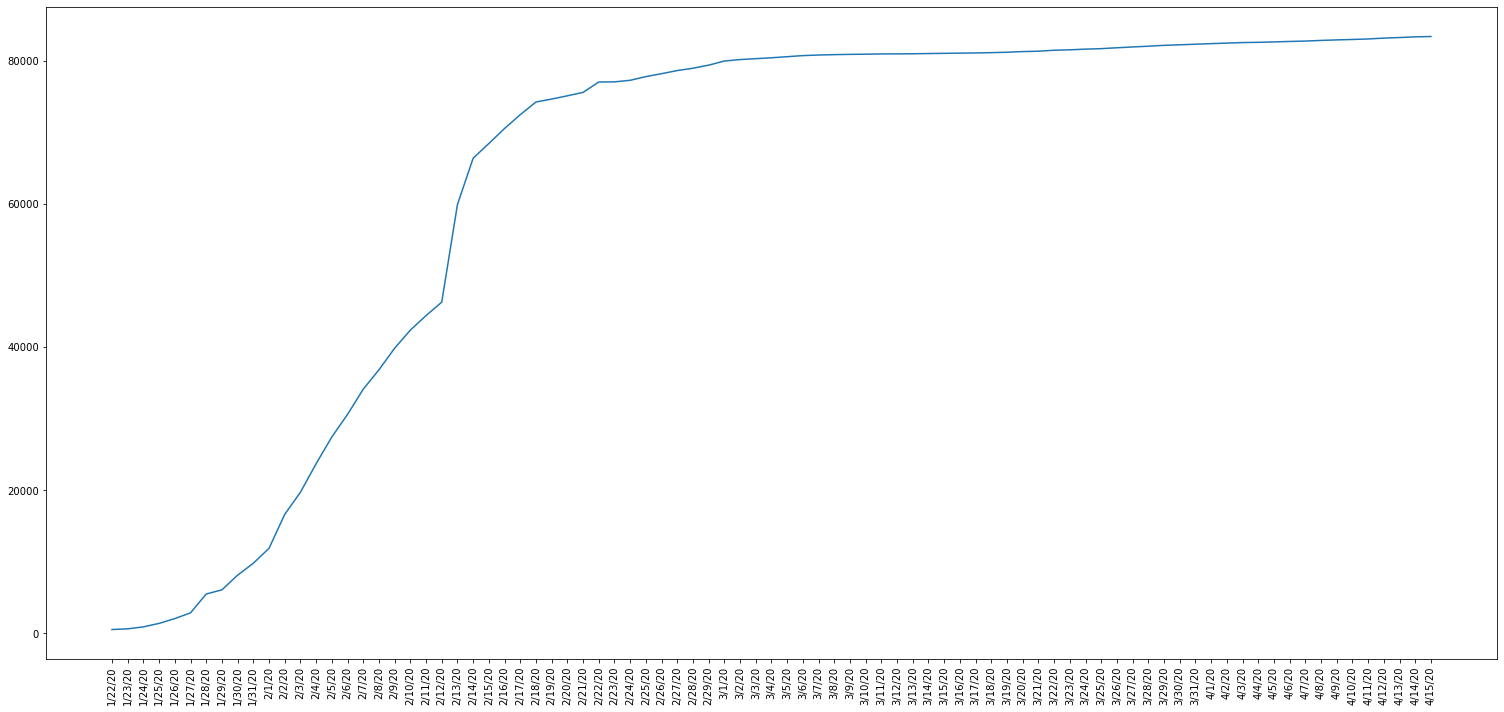

In [12]:
Y_confirmed_total = []
Y_deaths_total = []
X = df[df['Country/Region']=='China']['Date'].unique()

for i in X:
    Y_confirmed_total.append(df[df['Country/Region']=='China'][df['Date']==i]['Confirmed'].sum())
    Y_deaths_total.append(df[df['Country/Region']=='China'][df['Date']==i]['Deaths'].sum())

Confirmed_List[Country_List.tolist().index('China')]=Y_confirmed_total[-1]
D_Confirmed_List[Country_List.tolist().index('China')]=Y_confirmed_total[-1]-Y_confirmed_total[-2]
D_Confirmed_List_Mul[Country_List.tolist().index('China')]=Y_confirmed_total[-1]/Y_confirmed_total[-2]
Deaths_List[Country_List.tolist().index('China')]=Y_deaths_total[-1]
D_Deaths_List[Country_List.tolist().index('China')]=Y_deaths_total[-1]-Y_deaths_total[-2]
D_Deaths_List_Mul[Country_List.tolist().index('China')]=Y_deaths_total[-1]/Y_deaths_total[-2]

f,ax=plt.subplots(1,1)
f.set_figheight(12)
f.set_figwidth(26)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.plot(X,Y_confirmed_total)

### Re-ploting correctly
In regards to the 'abnormal' data format for China

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


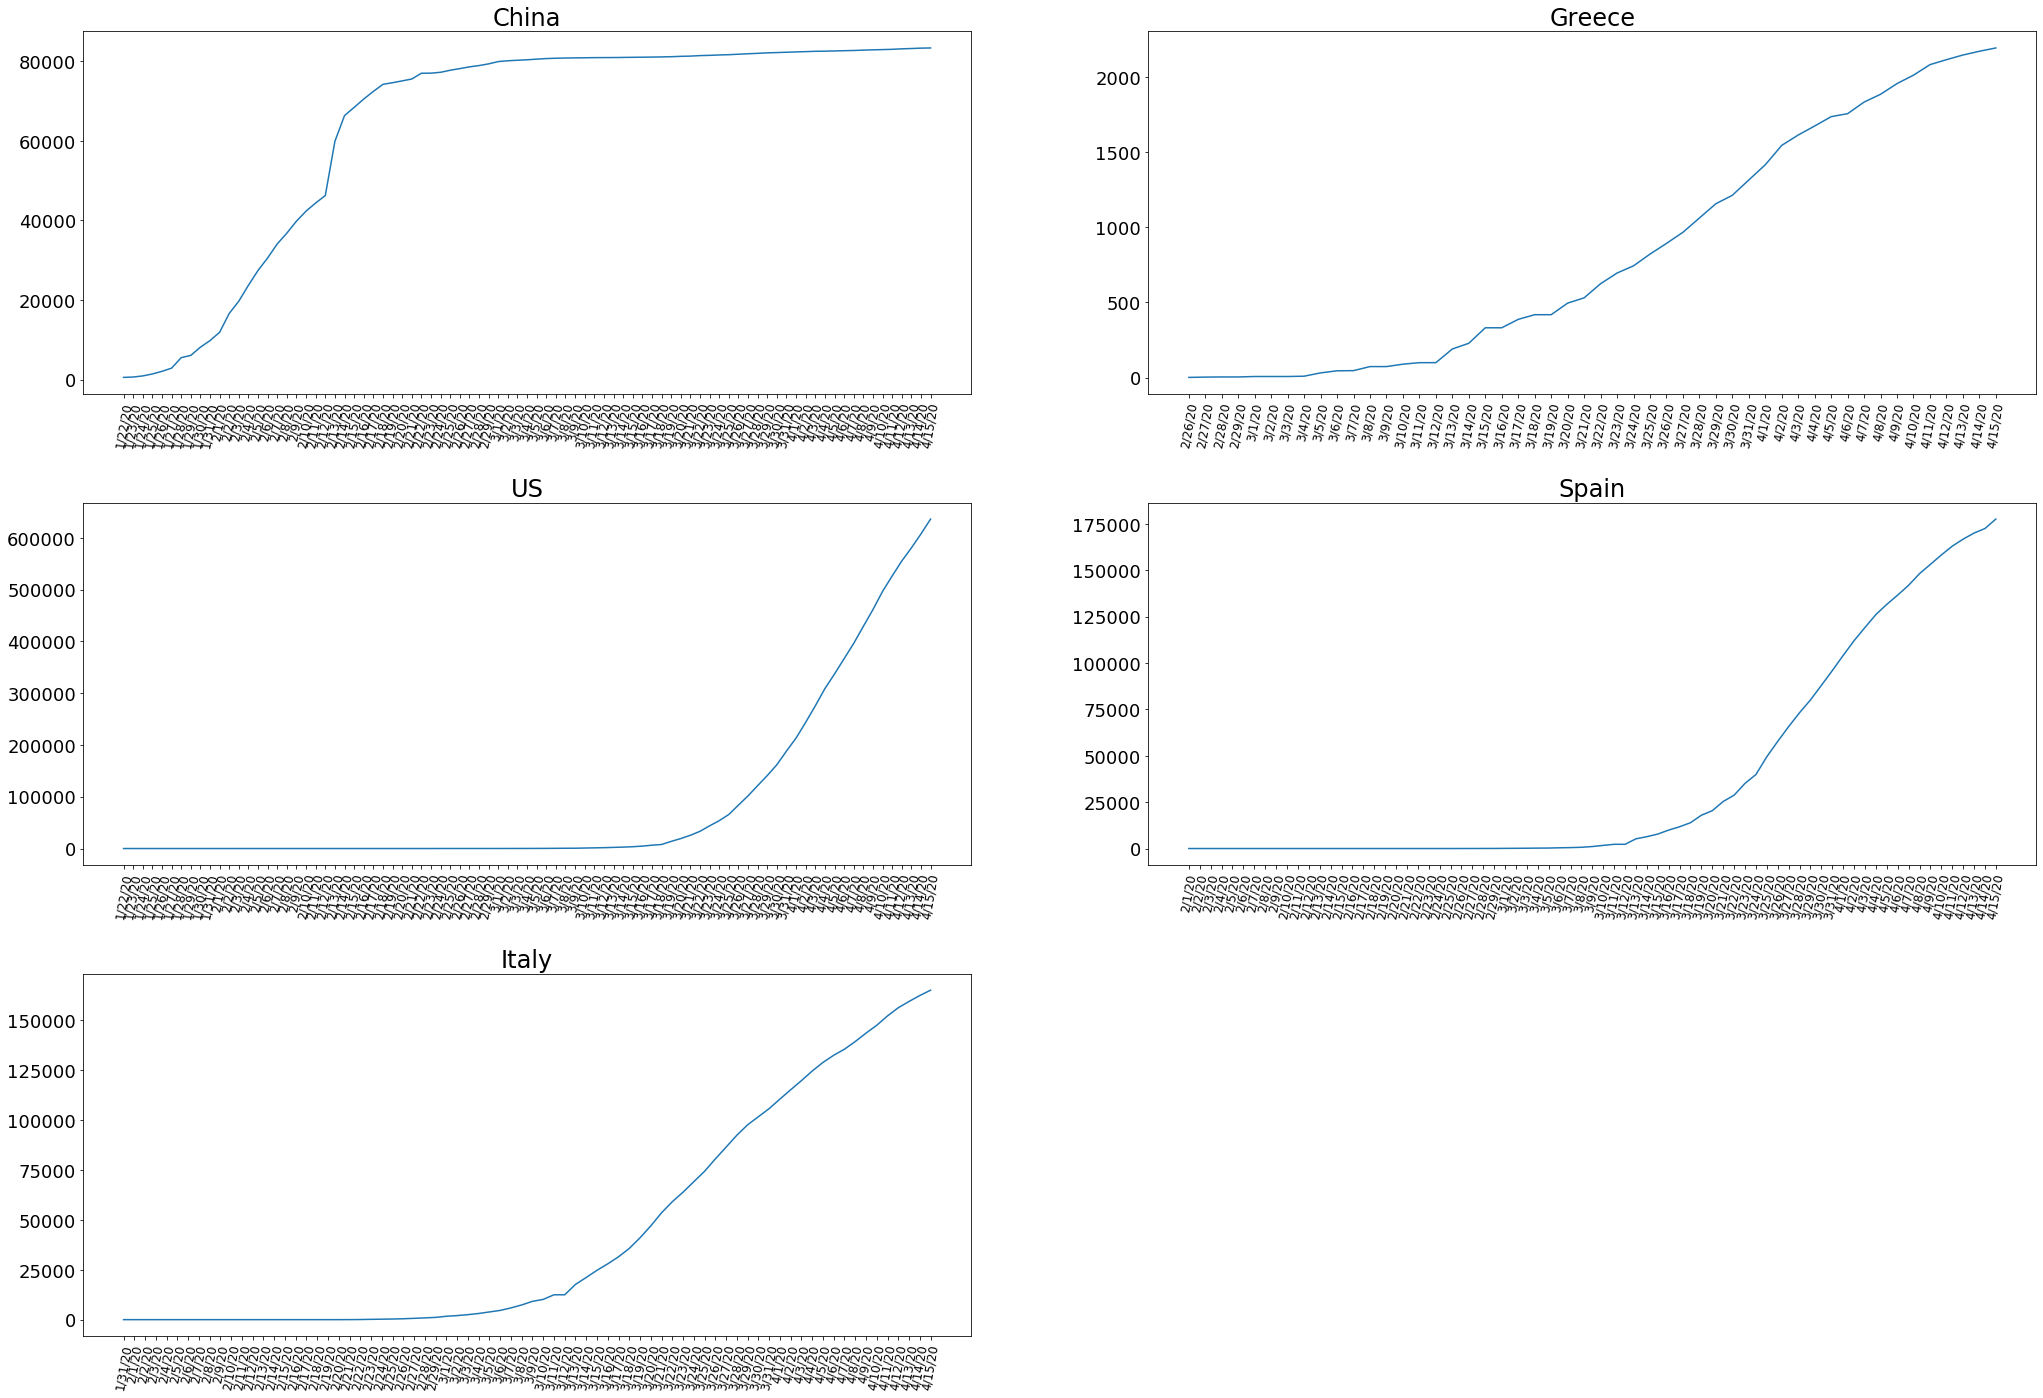

In [13]:
f, axes = plt.subplots(math.ceil(len(c_list)/2), 2)
f.set_figheight(24)
f.set_figwidth(35)
f.subplots_adjust(wspace=0.2,hspace=0.3)
x=0
y=0

for i in c_list:
    
    if Country_List[i] not in p_c_list:
        X = df[df['Country/Region']==Country_List[i]][df['Confirmed']>0]['Date'].to_list()
        Y = df[df['Country/Region']==Country_List[i]][df['Confirmed']>0]['Confirmed'].to_list()
    else:
        X = df[df['Country/Region']==Country_List[i]]['Date'].unique()
        Y = []
        for j in X:
            Y.append(df[df['Country/Region']==Country_List[i]][df['Date']==j]['Confirmed'].sum())
        
    for tick in axes[y][x].get_xticklabels():
        tick.set_rotation(80)
        tick.set_fontsize(12)
        
    for tick in axes[y][x].get_yticklabels():
        tick.set_fontsize(18)
        
    axes[y][x].set_title(Country_List[i],fontsize=24)
    axes[y][x].plot(X,Y)
    x+=1
    if x==2:
        x=0
        y+=1
if (len(c_list)-(2%len(c_list))*2)==1:
    f.delaxes(axes[-1][1])

It seems that China has impressively managed to reduce the infection rate close to 0, while the rest of the countries are increasing exponentialy.



### Making the same analysis on the countries with most deaths

In [14]:
#Making a list of countries with Greece being first while the rest of the countries included are sorted from worst to
#best accounting for the number of deaths.
c_list = [Country_List.tolist().index('Greece')] + np.flip(Sorted_D_Confirmed_List[-3:]).tolist()

if Country_List.tolist().index('China') not in c_list:
    c_list=[Country_List.tolist().index('China')]+c_list

for i in c_list: #Printing the stats on the 4 countries with biggest change of confirmed cases
    print(Country_List[i]+
          ' \nConfirmed:',Confirmed_List[i],
          ' \nincrease over the previous day:',D_Confirmed_List[i],'(Increased by factor: x'+str(D_Confirmed_List_Mul[i])+')',
          ' \nDeaths:',Deaths_List[i],
          ' \nincrease over the previous day:',D_Deaths_List[i],'(Increased by factor: x'+str(D_Deaths_List_Mul[i])+')',
          ' \n')

print('As of '+str(date.today()-timedelta(days=dt))+'.')

China 
Confirmed: 83356  
increase over the previous day: 50 (Increased by factor: x1.0006001968645717)  
Deaths: 3346  
increase over the previous day: 1 (Increased by factor: x1.0002989536621825)  

Greece 
Confirmed: 2192  
increase over the previous day: 22 (Increased by factor: x1.0101382488479262)  
Deaths: 102  
increase over the previous day: 1 (Increased by factor: x1.00990099009901)  

US 
Confirmed: 636350  
increase over the previous day: 28680 (Increased by factor: x1.0471966692448205)  
Deaths: 28326  
increase over the previous day: 2494 (Increased by factor: x1.096546918550635)  

Spain 
Confirmed: 177644  
increase over the previous day: 5103 (Increased by factor: x1.0295755791377121)  
Deaths: 18708  
increase over the previous day: 652 (Increased by factor: x1.0361098803721756)  

Turkey 
Confirmed: 69392  
increase over the previous day: 4281 (Increased by factor: x1.0657492589577797)  
Deaths: 1518  
increase over the previous day: 115 (Increased by factor: x1.0819

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


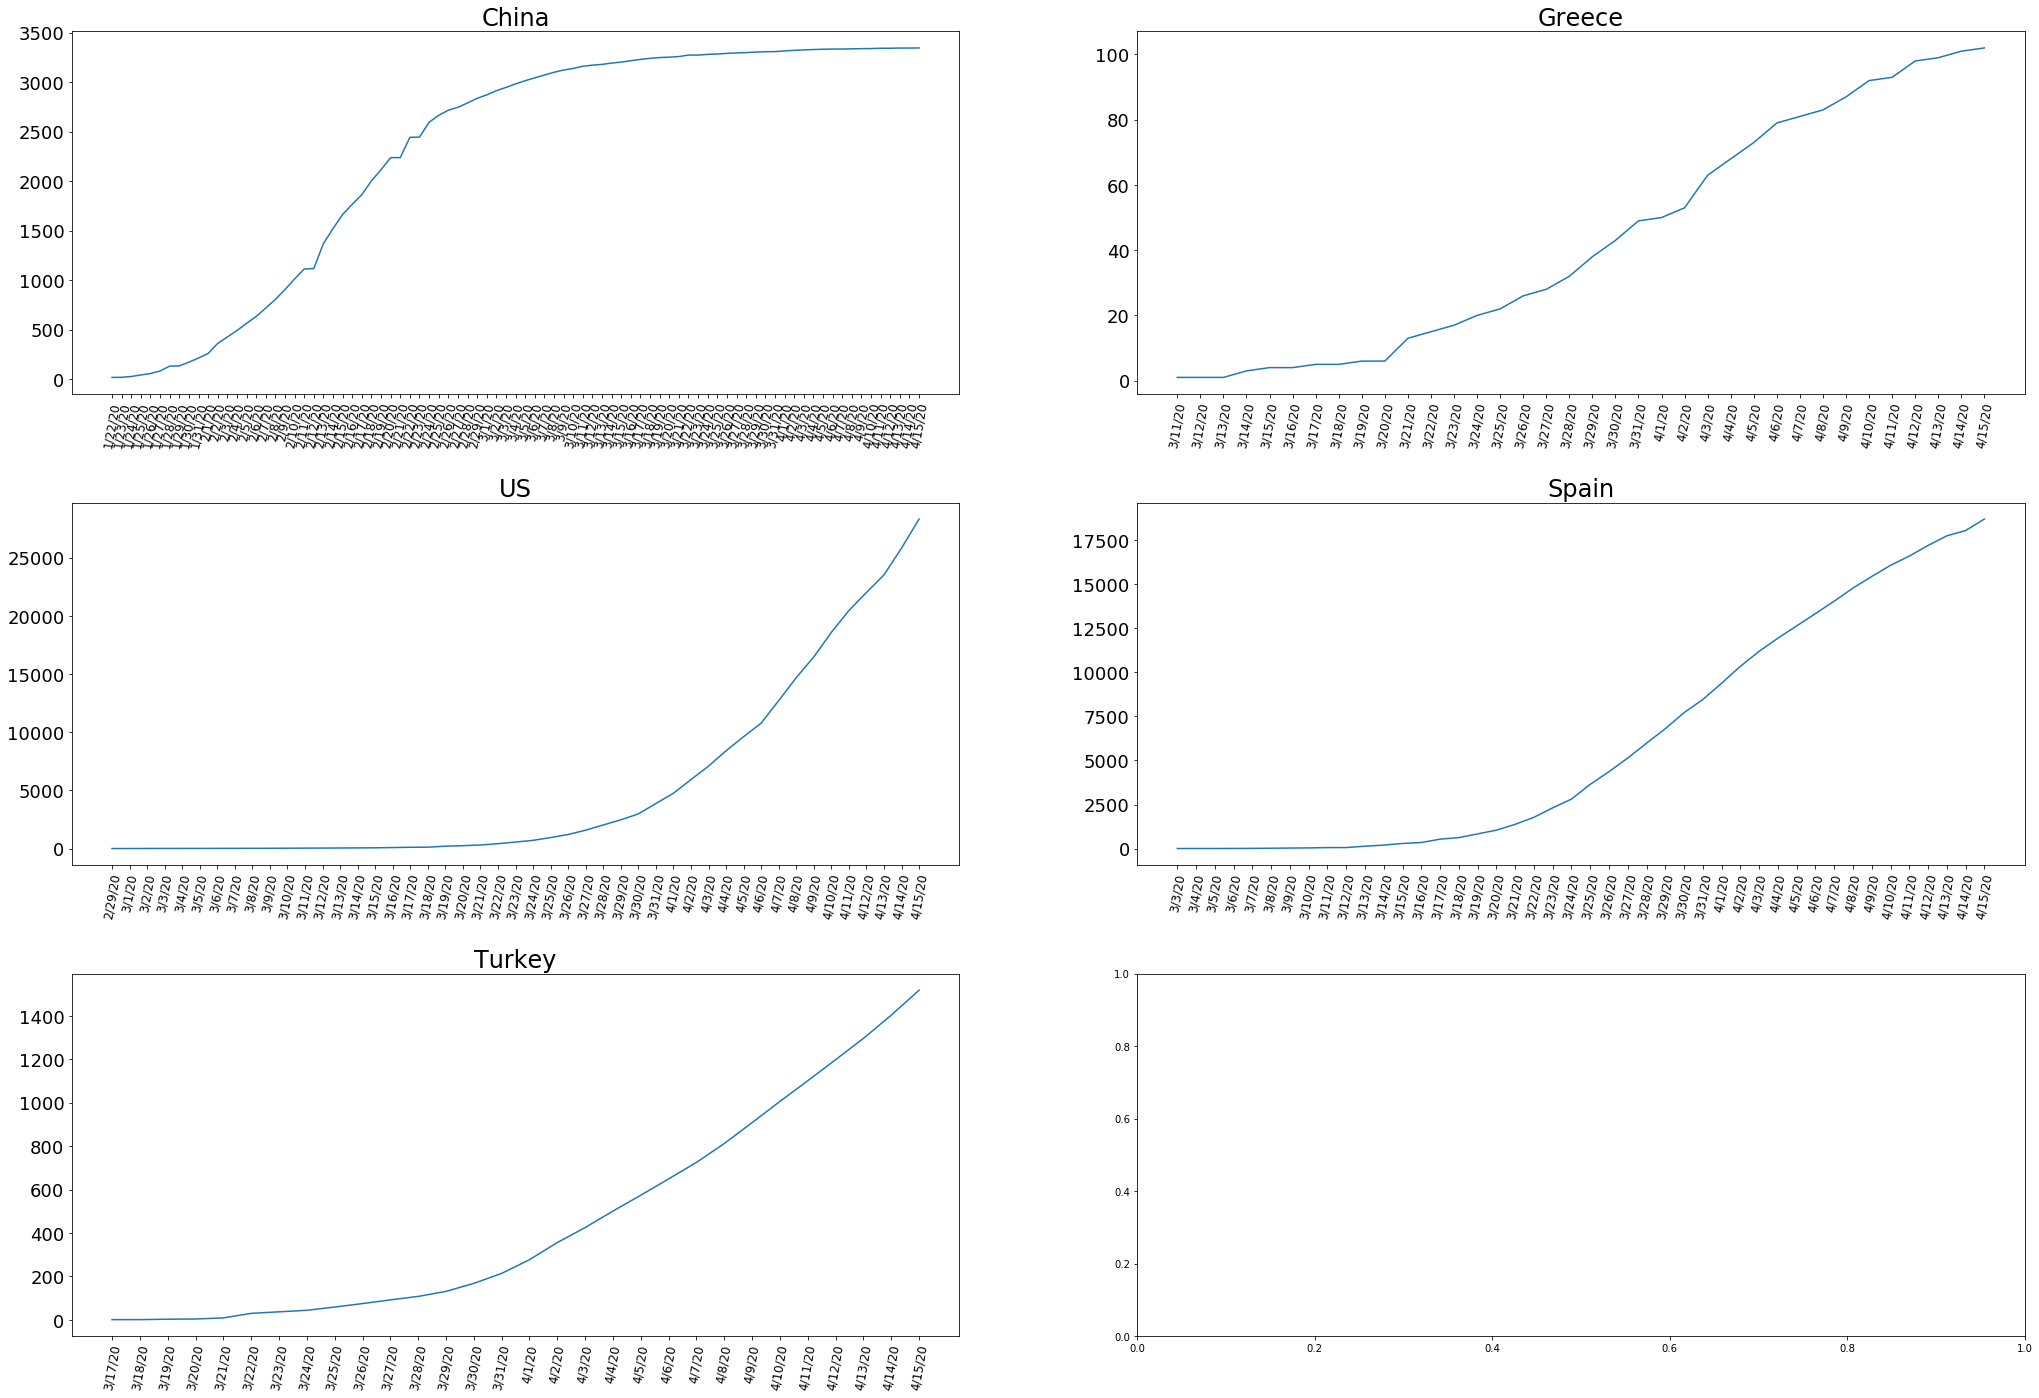

In [15]:
f, axes = plt.subplots(math.ceil(len(c_list)/2), 2)
f.set_figheight(24)
f.set_figwidth(35)
f.subplots_adjust(wspace=0.2,hspace=0.3)
x=0
y=0

for i in c_list:
    
    if Country_List[i] not in p_c_list:
        X = df[df['Country/Region']==Country_List[i]][df['Deaths']>0]['Date'].to_list()
        Y = df[df['Country/Region']==Country_List[i]][df['Deaths']>0]['Deaths'].to_list()
    else:
        X = df[df['Country/Region']==Country_List[i]]['Date'].unique()
        Y = []
        for j in X:
            Y.append(df[df['Country/Region']==Country_List[i]][df['Date']==j]['Deaths'].sum())
        
    for tick in axes[y][x].get_xticklabels():
        tick.set_rotation(80)
        tick.set_fontsize(12)
        
    for tick in axes[y][x].get_yticklabels():
        tick.set_fontsize(18)
        
    axes[y][x].set_title(Country_List[i],fontsize=24)
    axes[y][x].plot(X,Y)
    x+=1
    if x==2:
        x=0
        y+=1

We can (unfortunately) find out that the number of deaths is directly related to the number of incidents and the mortality rate seems to be confirming that, although it is rather unstable. Italy seems to be hit really hard :( ...

In [16]:
print('Mortality rate per country:')
for i in c_list+[Country_List.tolist().index('China')]:
    print(str(Country_List[i])+' : '+str(int(Deaths_List[i]/Confirmed_List[i]*1000)/10)+'%')

Mortality rate per country:
China : 4.0%
Greece : 4.6%
US : 4.4%
Spain : 10.5%
Turkey : 2.1%
China : 4.0%


## Enriching the dataset with general - per country - information

Sources:

- Wikipedia (Web scraping with beautifulsoup)
- World Bank's World Development Indicators publicly available at BigQuerry

### Enriching with non-timestamped data

Adding religion groups and general economic info

In [17]:
import requests
from bs4 import BeautifulSoup

res = requests.get("https://en.wikipedia.org/wiki/Religious_information_by_country").text
soup = BeautifulSoup(res,'html.parser')
tables = soup.find_all('table', class_='wikitable')
religions_df = []
i=1
for text in tables:
    for line in text.find_all('tr')[1::1]:
        if '<td>' in str(list(line)[i]):
            name = str(list(line)[i]).split('title=')[-1].split('</a>')[0].split('>')[-1]
            religions = str(list(line)[i+2]).split('0, ')[-1].replace('</td>','').replace('\n','').split(',')
            religions_df.append([name, religions])
            
rel_precs = []
rel_types = ['Christian','Muslim','Unaffiliated','Other','Buddhist','Folk','Hindu','Jewish']
n=0
for l in [[i[1:] if i[0]==' ' else i for i in j] for j in [i[1] for i in religions_df]]:
    k = [0,0,0,0,0,0,0,0]
    if n!=230:
        for rel in l:
            rel = rel.replace('%','').split(' ')
            if rel[0] in rel_types:
                k[rel_types.index(rel[0])] = float(rel[-1])/100
    else:
        k=[1,0,0,0,0,0,0,0]
    n+=1
    rel_precs.append(k)

religions_df = pd.DataFrame([[religions_df[i][0]] + rel_precs[i] for i in range(len(religions_df))],columns=['Country/Region']+['religion_'+i for i in rel_types])

for i in [[14,'Bahamas'],[31,'Burma'],[36,'Cabo Verde'],[48,'Congo (Kinshasa)'],[49,'Congo (Brazzaville)'],[55,'Czechia'],[76,'Gambia'],[103,"Cote d'Ivoire"],[110,'PRK'],[111,'South Korea'],[197,'Saint Kitts and Nevis'],[198,'Saint Lucia'],[201,'Saint Vincent and the Grenadines'],[204,'Eswatini'],[226,'US'],[230,'Holy See'],[163,'West Bank and Gaza']]:
    religions_df.at[i[0],'Country/Region']=i[1]
    
for i in ['Channel Islands','Tibet','European Union','Macau','Netherlands Antilles','Pitcairn Islands','Réunion', 'St. Barthelemy','St Helena, Ascension and Tristan da Cunha','St. Martin','St. Pierre and Miquelon','Taiwan','Turks and Caicos Islands','Wallis and Futuna','World','Virgin Islands, British','Virgin Islands, U.S.']:
    religions_df = religions_df[religions_df['Country/Region']!=i]
    
df = df.join(religions_df.set_index('Country/Region'), on=['Country/Region'])

print('Countries not found with religion:\n',df[df.religion_Christian.isnull()]['Country/Region'].unique())

Countries not found with religion:
 ['Diamond Princess' 'Taiwan*' 'MS Zaandam']


In [18]:
df.drop(df[df['Country/Region'].isin(['Diamond Princess' 'Taiwan*' 'MS Zaandam'])].index, inplace=True)

In [19]:
from google.cloud import bigquery
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'C:/Users/alexa/Data_Analysis/Covid/stone-arcade-256419-69385477df52.json'

client = bigquery.Client(project='bigquery-public-data')

dataset_ref = client.dataset("world_bank_wdi")
economy_dataset = client.get_dataset(dataset_ref)
table = list(client.list_tables(economy_dataset))

table_ref = dataset_ref.table('indicators_data')
table = client.get_table(table_ref)
economy_df = client.list_rows(table).to_dataframe()

In [20]:
economy_df = economy_df.drop(['country_code','indicator_code'],axis=1)
scn = [['Bahamas, The','Bahamas'],['Brunei Darussalam','Brunei'],['Myanmar','Burma'],['Congo, Dem. Rep.','Congo (Kinshasa)'],['Congo, Rep.','Congo (Brazzaville)'],['Czech Republic','Czechia'],['Egypt, Arab Rep.','Egypt'],['Gambia, The','Gambia'],['Iran, Islamic Rep.','Iran'],['Korea, Rep.','South Korea'],['Kyrgyz Republic','Kyrgyzstan'],['Lao PDR','Laos'],['Russian Federation','Russia'],['St. Kitts and Nevis','Saint Kitts and Nevis'],['St. Lucia','Saint Lucia'],['St. Vincent and the Grenadines','Saint Vincent and the Grenadines'],['Slovak Republic','Slovakia'],['Syrian Arab Republic','Syria'],['United States','US'],['Venezuela, RB','Venezuela']]

for i in scn:
    economy_df.loc[(economy_df.country_name==i[0]),'country_name']=i[1]

In [21]:
indicators = ['GDP (constant 2010 US$)','GDP (constant 2010 US$)','GNI (constant 2010 US$)','Agriculture, forestry, and fishing, value added (% of GDP)','Current health expenditure (% of GDP)','Military expenditure (% of GDP)','Unemployment, total (% of total labor force) (modeled ILO estimate)','Imports of goods and services (% of GDP)','Profit tax (% of commercial profits)','International tourism, receipts (% of total exports)','Labor force with advanced education (% of total working-age population with advanced education)','Unemployment, total (% of total labor force) (modeled ILO estimate)','Transport services (% of commercial service imports)','Life expectancy at birth, total (years)','Surface area (sq. km)','Population density (people per sq. km of land area)','Population, female','Population, male','Population, total','Population in the largest city (% of urban population)','Rural population (% of total population)','Urban population (% of total population)','Population ages 65 and above (% of total population)','Primary completion rate, total (% of relevant age group)','Access to electricity, urban (% of urban population)','Hospital beds (per 1,000 people)','Immunization, HepB3 (% of one-year-old children)','Adults (ages 15+) and children (ages 0-14) newly infected with HIV','Unemployment with advanced education (% of total labor force with advanced education)']

tmp = economy_df.country_name.unique()
missing = [i for i in df['Country/Region'].unique() if i not in tmp]
print(missing)

['Diamond Princess', 'Holy See', 'Taiwan*', 'MS Zaandam', 'Western Sahara', 'Yemen']


In [22]:
p = [economy_df.indicator_name.isin(indicators)]

temp_df = pd.DataFrame(columns = ['Country/Region']+list(economy_df[economy_df.indicator_name.isin(indicators)].pivot_table('value',['country_name','year'],'indicator_name').reset_index(drop=True).columns))

for c_name in df['Country/Region'].unique():
    if c_name not in missing:
        q = economy_df[economy_df.country_name==c_name][economy_df.indicator_name.isin(indicators)].pivot_table('value',['country_name','year'],'indicator_name').reset_index(drop=True)
       
        qi = q.notna()[::-1].idxmax()
        val = [c_name]
        
        for i in list(q.columns):
            val.append(q.loc[qi[i]][i])
        
        t_df = pd.DataFrame(columns = ['Country/Region']+list(q.columns))
        t_df.loc[0]=val
        temp_df = temp_df.append(t_df)
        
df = df.join(temp_df.set_index('Country/Region'),on=['Country/Region'])

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [23]:
df.to_csv('../Datasets/Covid/df_enchanced.csv',index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22270 entries, 0 to 22269
Data columns (total 45 columns):
Province/State                                                                                     6800 non-null object
Country/Region                                                                                     22270 non-null object
Lat                                                                                                22270 non-null float64
Long                                                                                               22270 non-null float64
Date                                                                                               22270 non-null object
Confirmed                                                                                          22270 non-null int64
Deaths                                                                                             22270 non-null int64
Recovered                                    

### Enriching the dataset with timestamped data - [WIP]

There is nothing here yet, move along.

In [24]:
df = pd.read_csv('../Datasets/Covid/df_enchanced.csv')
df.Date = pd.to_datetime(df.Date)

In [29]:
output_notebook()

p11 = figure(x_axis_type='datetime', x_axis_label='Date', y_axis_type='mercator', y_axis_label='Infected (x10.000)')
p11.title.text = '6 most COVID-19 infected countries [low-GDP vs high-GDP]'

p21 = figure(x_axis_type='datetime', x_axis_label='Date', y_axis_label='Deaths (x10.000)')
p21.title.text = '6 countries with most deaths by COVID-19 [low-GDP vs high-GDP]'

t1 = df[df['GDP (constant 2010 US$)']<=1000000000000]
t2 = df[df['GDP (constant 2010 US$)']>1000000000000]

low_gdp = t1[t1['Date']==t1['Date'].max()].sort_values(by=['Confirmed'])['Country/Region'][-6:]
high_gdp = t2[t2['Date']==t2['Date'].max()].sort_values(by=['Confirmed'])['Country/Region'][-6:]

deaths = []

for c_name in low_gdp:
    
    t0 = t1[t1['Country/Region']==c_name]
    
    x = t0[['Country/Region','Date','Confirmed']].groupby(['Country/Region','Date']).sum().reset_index()['Date']
    y = t0[['Country/Region','Date','Confirmed']].groupby(['Country/Region','Date']).sum()['Confirmed'].to_list()
    
    p11.line(x=x,y=y, color='red', legend_label='Low GDP Countries')
    
    y = t0[['Country/Region','Date','Deaths']].groupby(['Country/Region','Date']).sum()['Deaths'].apply(lambda x: x/10000) 
    
    p21.line(x=x,y=y, color='red', legend_label='Low GDP Countries')

for c_name in high_gdp:
    
    t0 = t2[t2['Country/Region']==c_name]
    
    x = t0[['Country/Region','Date','Confirmed']].groupby(['Country/Region','Date']).sum().reset_index()['Date']
    y = t0[['Country/Region','Date','Confirmed']].groupby(['Country/Region','Date']).sum()['Confirmed']
             
    p11.line(x=x, y=y, color='violet', legend_label='High GDP Countries')
    
    y = t0[['Country/Region','Date','Deaths']].groupby(['Country/Region','Date']).sum()['Deaths'].apply(lambda x: x/10000)
    
    deaths.append([c_name, y[-1]])
    
    p21.line(x=x,y=y, color='violet', legend_label='High GDP Countries')
    
p11.legend.location = "top_left"
p11.legend.click_policy="hide"

p21.legend.location = "top_left"
p21.legend.click_policy="hide"
    
show(row(p11,p21))

Loading BokehJS ...